Caitlin Lindsay Chosen Dataset: Abalone (https://archive.ics.uci.edu/dataset/1/abalone)

In [11]:
!pip install ucimlrepo

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [2]:
#Import dataset
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
X = abalone.data.features
y = abalone.data.targets 
  
# metadata 
#print(abalone.metadata) 
print("\n")  
# variable information 
print(abalone.variables) 




             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7      

Root Mean Squared Error: 3.133588676011997


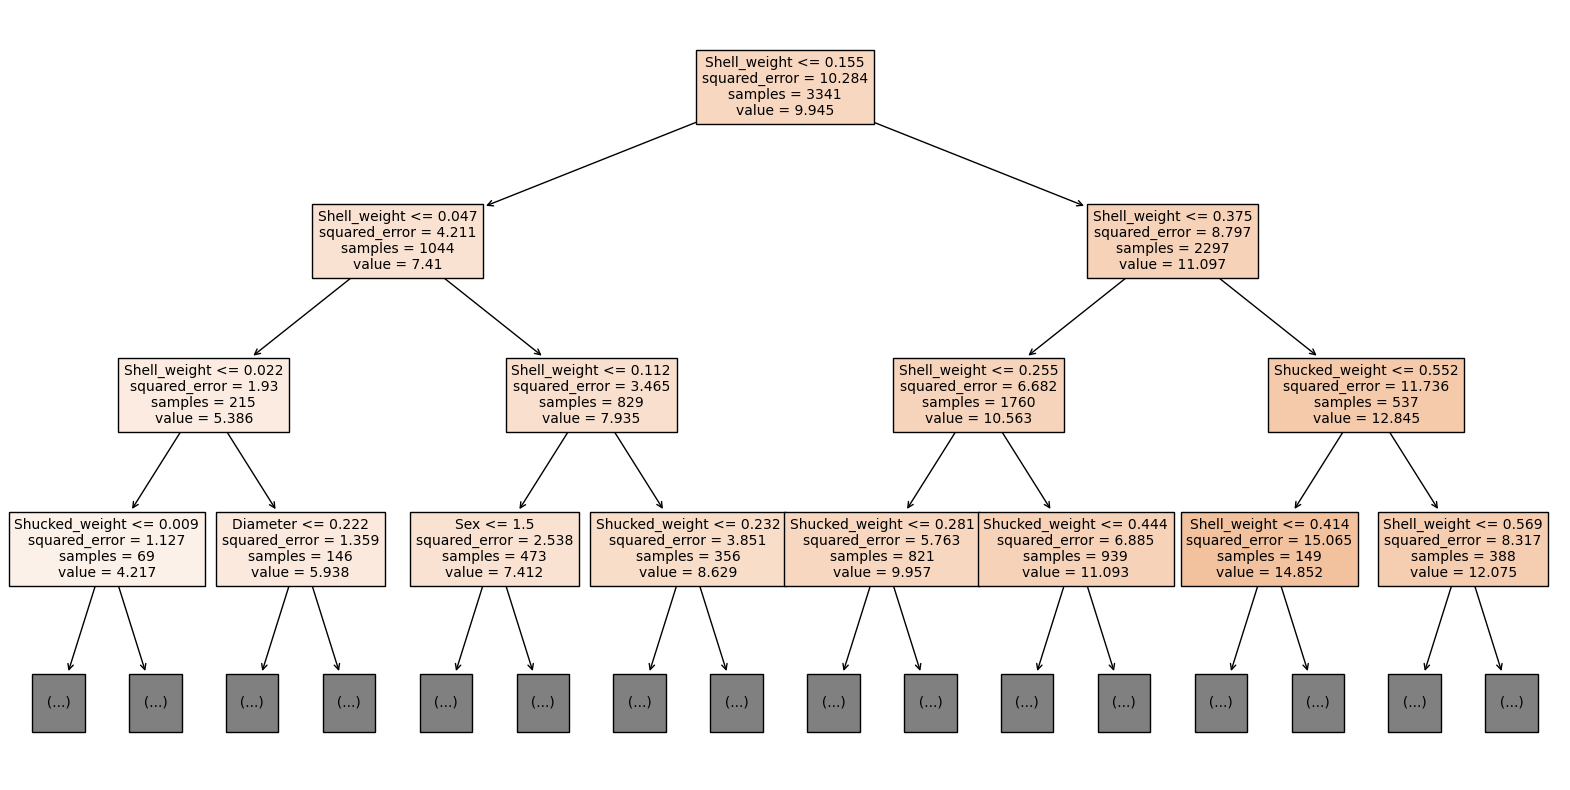

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame with 'Rings' as the target and all necessary preprocessing done

column_transformer = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(), ['Sex'])],   # The column(s) to be transformed
    remainder='passthrough'                            # Leave the rest of the columns unchanged
)

X_encoded = column_transformer.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=['Sex_M', 'Sex_F', 'Sex_I'] + [col for col in X.columns if col != 'Sex'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y.Rings, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor
tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred = tree_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error: {rmse}")

# Plot the tree (optional, and can be limited by max_depth for larger trees)
plt.figure(figsize=(20,10))
plot_tree(tree_regressor, filled=True, feature_names=X.columns, max_depth=3, fontsize=10)
plt.show()
